# Stoce Price Pridiction model

### install depenecies

In [524]:

import numpy as np # for effective data managements
import pandas as pd # for managing the datas
from sklearn.tree import DecisionTreeRegressor # for using decision tree regressor model
from sklearn.linear_model import LinearRegression # for using linear regression model
from sklearn.model_selection import train_test_split # for to split the data effectivly
import matplotlib.pyplot as plt # graph visualization
from sklearn.tree import DecisionTreeClassifier # for the classification purpose
from sklearn.metrics import classification_report # used to mesure the prediction

### load data in to pandas data frame

In [481]:
df = pd.read_csv('ADP.csv') # read the data from the local folder

In [482]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,17-03-1980,0.808554,0.0,1158040,0.827141,0.817847,0.418825
1,18-03-1980,0.814749,0.0,1622063,0.830239,0.827141,0.423584
2,19-03-1980,0.827141,0.0,1367859,0.842631,0.842631,0.431517
3,20-03-1980,0.839533,0.0,3046412,0.861218,0.839533,0.429931
4,21-03-1980,0.836435,0.0,1020851,0.848826,0.836435,0.428344


## **Data Preprocessing**

-  **checking missing data**

In [483]:
pd.isnull(df).sum() 

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [484]:
pd.notnull(df).sum()

Date              10778
Low               10778
Open              10778
Volume            10778
High              10778
Close             10778
Adjusted Close    10778
dtype: int64

no missing data

- **checking duplication of of record**

In [485]:
df.duplicated().sum()

0

no duplicated records

- **managing data types**

In [486]:
df.info() # look at the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10778 non-null  object 
 1   Low             10778 non-null  float64
 2   Open            10778 non-null  float64
 3   Volume          10778 non-null  int64  
 4   High            10778 non-null  float64
 5   Close           10778 non-null  float64
 6   Adjusted Close  10778 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 589.5+ KB


In [487]:
df['Date'] = pd.to_datetime(df['Date']) # changing the Date object into datetime64[ns] format.

/tmp/ipykernel_56984/1701485851.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date']) # changing the Date object into datetime64[ns] format.


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10778 non-null  datetime64[ns]
 1   Low             10778 non-null  float64       
 2   Open            10778 non-null  float64       
 3   Volume          10778 non-null  int64         
 4   High            10778 non-null  float64       
 5   Close           10778 non-null  float64       
 6   Adjusted Close  10778 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 589.5 KB


In [489]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [490]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Day,Month,Year
0,1980-03-17,0.808554,0.0,1158040,0.827141,0.817847,0.418825,17,3,1980
1,1980-03-18,0.814749,0.0,1622063,0.830239,0.827141,0.423584,18,3,1980
2,1980-03-19,0.827141,0.0,1367859,0.842631,0.842631,0.431517,19,3,1980
3,1980-03-20,0.839533,0.0,3046412,0.861218,0.839533,0.429931,20,3,1980
4,1980-03-21,0.836435,0.0,1020851,0.848826,0.836435,0.428344,21,3,1980


In [491]:
df = df[['Date', 'Day', 'Month', 'Year', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']]

In [492]:
Pdf = df;

In [493]:
df = Pdf;

# Regression Analysis using DecisionTreeRegressor and LinearRegression

visualizing the close price.

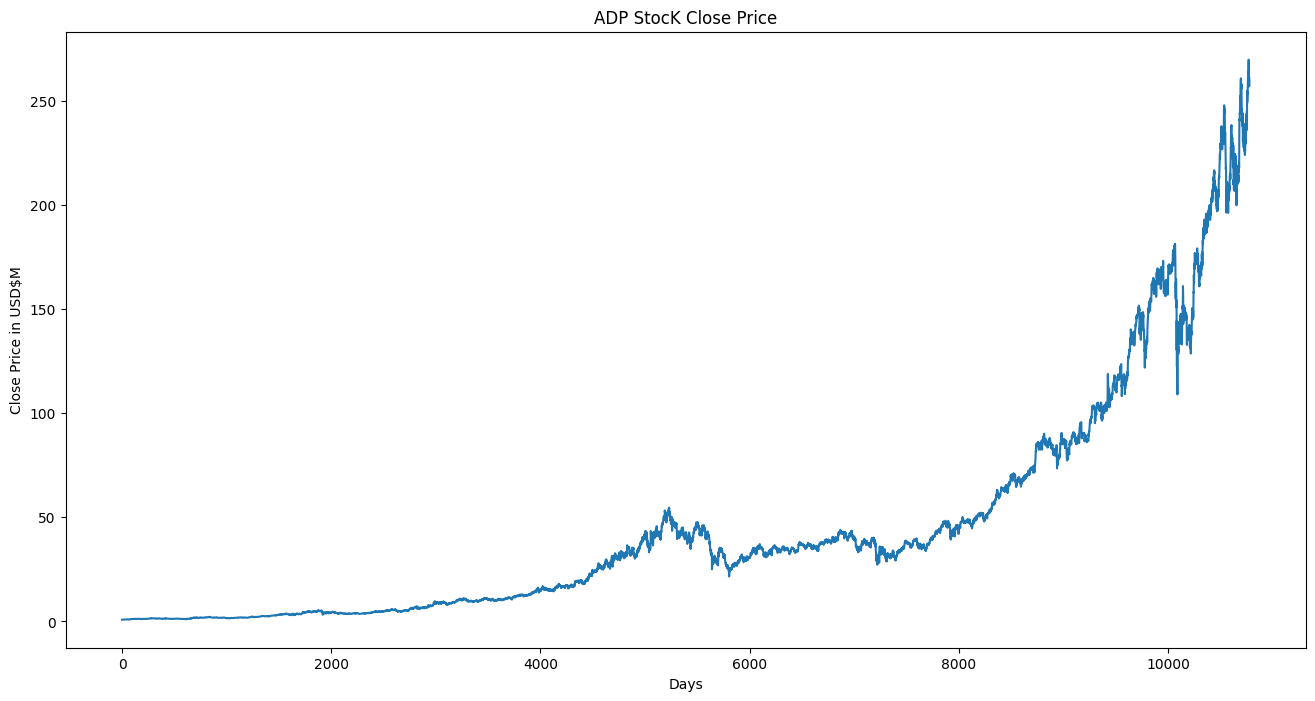

In [494]:
plt.figure(figsize=(16, 8))
plt.title("ADP StocK Close Price")
plt.xlabel('Days')
plt.ylabel('Close Price in USD$M')
plt.plot(df['Close'])
plt.show()

In [495]:
# get the only close price
df = df[['Close']]
df.head(3) # head of 3 close prices.

,Close
0,0.817847
1,0.827141
2,0.842631


In [496]:
df.tail(3) # tail of 3 close prices.

,Close
10775,260.049988
10776,257.200012
10777,261.234985


In [497]:
# create a variable to pridict 'n' days out in to the future.
rows = len(df.axes[0])
# get 10% of the total days out. assume it is the futre.
future_days = rows // 9
print(future_days, " used to pridict the futre close price")
# create a new column (target) shifted n days up
df['Pridiction'] = df[['Close']].shift(-future_days) # create a new new Pridiction Column with out the last n days.
df.tail(5)

1197  used to pridict the futre close price


/tmp/ipykernel_56984/2242213286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pridiction'] = df[['Close']].shift(-future_days) # create a new new Pridiction Column with out the last n days.


,Close,Pridiction
10773,258.529999,NaN
10774,259.220001,NaN
10775,260.049988,NaN
10776,257.200012,NaN
10777,261.234985,NaN


In [498]:
# create the futre data set (F) and convert into numpy array with out the futre_days of days. 
F = np.array(df.drop(['Pridiction'], 1))[:-future_days]

/tmp/ipykernel_56984/3452656252.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  F = np.array(df.drop(['Pridiction'], 1))[:-future_days]


In [499]:
# create the target data set (T) and convert into nmpy array execpt the last future_days of days.
T = np.array(df['Pridiction'])[:-future_days]

In [512]:
# Split the data in to 80% for training and 20% for testing 
f_train, f_test, t_train, t_test = train_test_split(F, T, test_size = 0.2)
print(f_train.shape)
print(f_test.shape)
print(t_train.shape)
print(t_test.shape)

(7664, 1)
(1917, 1)
(7664,)
(1917,)


### DecisionTreeRegressor Model

In [501]:
# create a decision tree regressor model
tree = DecisionTreeRegressor().fit(f_train.reshape(-1, 1), t_train.reshape(-1,1))

### LinearRegression Model

In [502]:
# create a Linear Regression model
lr = LinearRegression().fit(f_train, t_train)

- **The future data set**

In [503]:
n_future = df.drop(['Pridiction'], 1)[:-future_days]
n_future = n_future.tail(future_days)
n_future = np.array(n_future)
n_future

/tmp/ipykernel_56984/2751072338.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n_future = df.drop(['Pridiction'], 1)[:-future_days]


array([[ 59.11325836],
       [ 59.94732285],
       [ 59.71027374],
       ...,
       [118.83000183],
       [117.52999878],
       [117.38999939]])

## Using of Model

- **using the treeRegressor model**

In [504]:
# tree pridictin
tree_pridiction = tree.predict(n_future);
print(tree_pridiction)

[116.09999847 116.48000336 117.16000366 ... 260.04998779 257.20001221
 218.17999268]


- **using the linearRegression**

In [505]:
# linear pridiction
lr_pridiction = lr.predict(n_future)
print(lr_pridiction)

[107.60728733 109.18429583 108.73609493 ... 220.51679734 218.05881488
 217.79411086]


## visualiziing the data pridicted

- **Decission Tree validated data show**

/tmp/ipykernel_56984/3937054636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pridictions'] = pridictions # add a new column to the valid that predicted in the decission tree regressor


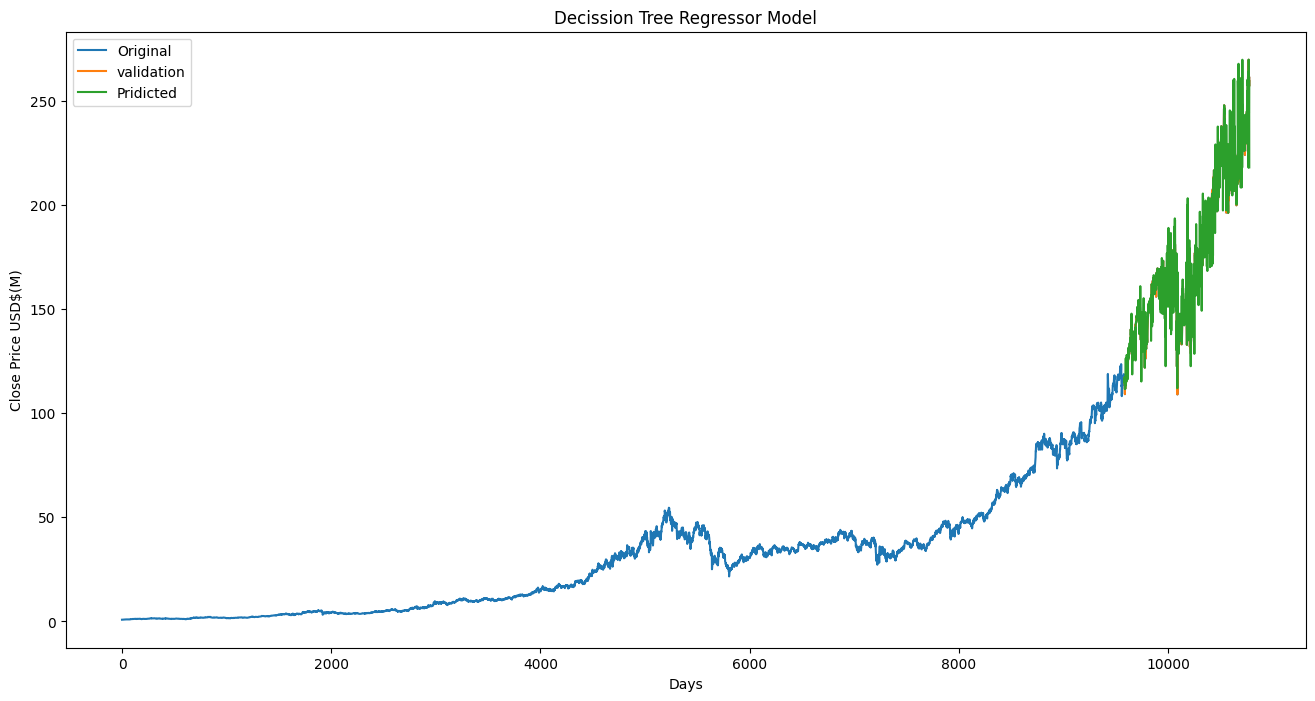

In [506]:
# visualizing the decission tree regressor pridiction how are fiting to the actual data.

pridictions = tree_pridiction

valid = df[F.shape[0]:] # copy all valid data on the valid.
valid['Pridictions'] = pridictions # add a new column to the valid that predicted in the decission tree regressor

# creating the figure to plot.
plt.figure(figsize = (16, 8))
plt.title('Decission Tree Regressor Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD$(M)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Pridictions']])
plt.legend(['Original', 'validation', 'Pridicted'])
plt.show()

- **linear regression validated Data show**

/tmp/ipykernel_56984/2295819298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pridictions'] = pridictions # add a new column to the valid that predicted in the decission tree regressor


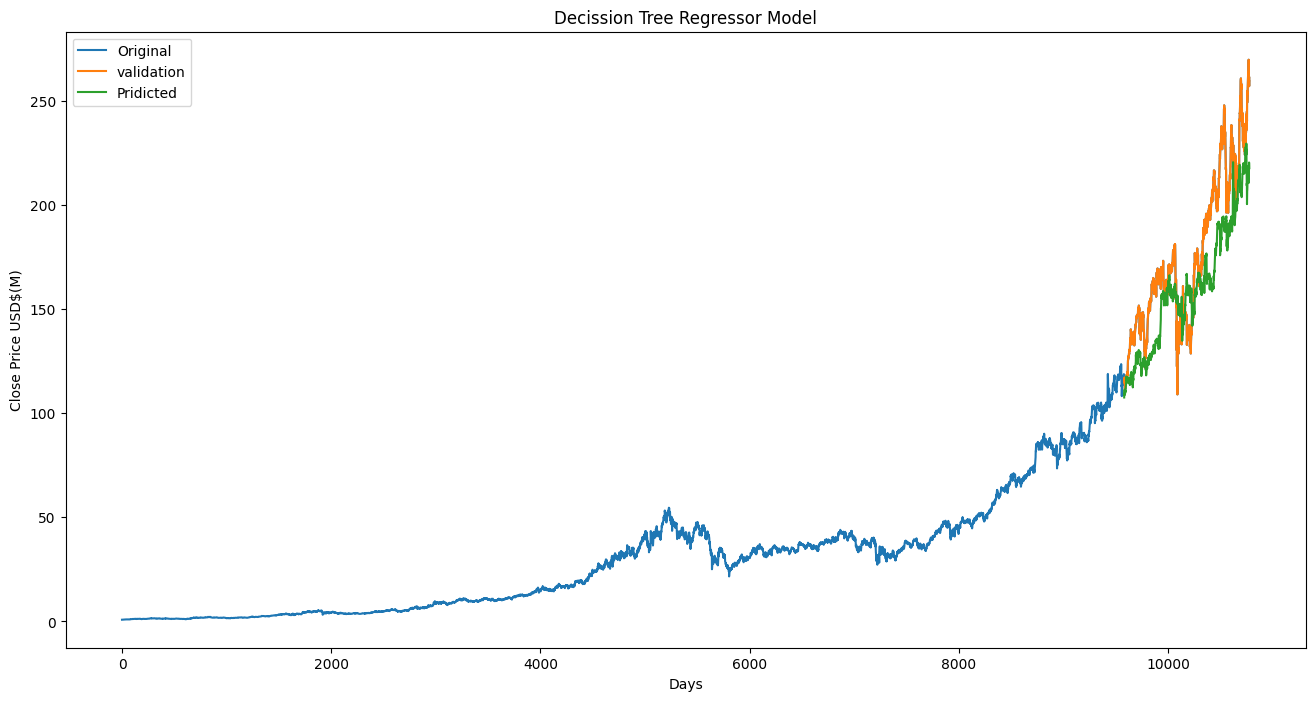

In [507]:
# visualizing the linear regression pridiction how are fiting to the actual data.

pridictions = lr_pridiction

valid = df[F.shape[0]:] # copy all valid data on the valid.
valid['Pridictions'] = pridictions # add a new column to the valid that predicted in the decission tree regressor

# creating the figure to plot.
plt.figure(figsize = (16, 8))
plt.title('Decission Tree Regressor Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD$(M)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Pridictions']])
plt.legend(['Original', 'validation', 'Pridicted'])
plt.show()

# Stock Market buy and sell classification

In [748]:
# Pre-proccessed DataFrame 
Pdf.head()

,Date,Day,Month,Year,Low,Open,Volume,High,Close,Adjusted Close,Return
0,1980-03-17,17,3,1980,0.808554,0.0,1158040,0.827141,0.817847,0.418825,0.344699
1,1980-03-18,18,3,1980,0.814749,0.0,1622063,0.830239,0.827141,0.423584,0.337080
2,1980-03-19,19,3,1980,0.827141,0.0,1367859,0.842631,0.842631,0.431517,0.305148
3,1980-03-20,20,3,1980,0.839533,0.0,3046412,0.861218,0.839533,0.429931,0.302583
4,1980-03-21,21,3,1980,0.836435,0.0,1020851,0.848826,0.836435,0.428344,0.311110


### using a binarry classification
- buy or sell singnal.
- based on the returns of the days percentage.
- sell = (1), buy = (0) singnal.

In [749]:
# a new column 'Return' in the regarding of Adjusted Close Price
Pdf['Return'] = Pdf['Adjusted Close'].pct_change(90).shift(-90) # 90 days
# create the list of features fot the classification.
feature = ['Day', 'Month', 'Year', 'Low', 'Low', 'Volume', 'High', 'Close', 'Adjusted Close']
# populate the data set with features in 'x' variable
x = Pdf[feature]
x.tail()

,Day,Month,Year,Low,Low,Volume,High,Close,Adjusted Close
10773,12,6,2022,257.049988,257.049988,1371300,264.670013,258.529999,257.283325
10774,12,7,2022,257.329987,257.329987,1265500,259.809998,259.220001,257.970001
10775,12,8,2022,258.200012,258.200012,1197200,261.019989,260.049988,260.049988
10776,12,9,2022,256.950012,256.950012,1991400,260.380005,257.200012,257.200012
10777,12,12,2022,257.459991,257.459991,209618,261.769989,261.234985,261.234985


In [750]:
# populate the buy sell signal in the condition in the 'y' variable
y = np.where(Pdf.Return > 0, 1, 0)
print(y)

[1 1 1 ... 0 0 0]


In [751]:
# split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=550)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7544, 9)
(3234, 9)
(7544,)
(3234,)


### **Decision Tree Classifier**

In [752]:
# Decision Tree classifier
treeClassifier = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [753]:
# predictions classes using x_test data
y_pred = treeClassifier.predict(x_test)

### **Performance**

In [754]:
# checking the performance of the pridicted classes
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       948
           1       0.92      0.92      0.92      2286

    accuracy                           0.89      3234
   macro avg       0.87      0.87      0.87      3234
weighted avg       0.89      0.89      0.89      3234

